In [2]:
from google.colab import drive
drive.mount('/content/drive')
import sys
ROOT_PATH='/content/drive/My Drive/Colab Notebooks/learning_ai/'
sys.path.append(ROOT_PATH)

Mounted at /content/drive


In [5]:
from common import config
config.GPU=True
from common.np import *
from model.auto_encoder_conv import *
from common.optimizer import *
from common.trainer import Trainer
from dataset.mnist import load_mnist
from common.util import to_cpu,to_gpu

(x_train,t_train),(x_test,t_test)=load_mnist(normalize=True)

if GPU:
    x_train=to_gpu(x_train)
    x_test=to_gpu(x_test)

x_train=x_train.reshape(x_train.shape[0],1,28,28)
t_train=x_train.reshape(x_train.shape[0],-1)

input_shape=(1,28,28)
conv_param_enc=[[16,3,1,1],[16,3,1,1],[32,3,1,1],[32,3,1,1],[64,3,1,1],[64,3,1,1]]
generate_size=2
hidden_list_dec=[256,512]
output_size=784
generate_activation='sigmoid'
activation='relu'
use_batchnorm=False
show_distribution=False
file_name=None

lr=0.001

max_epoch=20
batch_size=32
max_grad=None
eval_interval=100

args_trainer=(x_train,t_train,max_epoch,batch_size,clip_grads,eval_interval)

model=ConvAE(input_shape=input_shape,conv_param_enc=conv_param_enc,generate_size=generate_size,hidden_list_dec=hidden_list_dec,output_size=output_size,generate_activation=generate_activation,activation=activation,use_batchnorm=use_batchnorm,show_distribution=show_distribution)
optimizer=Adam(lr)
trainer=Trainer(model,optimizer,file_name)

trainer.fit(x=x_train,t=t_train,max_epoch=max_epoch,batch_size=batch_size,max_grad=max_grad,eval_interval=eval_interval)

| epoch 1 |  iter 1 / 1875 | time 0[s] | loss 120.04
| epoch 1 |  iter 101 / 1875 | time 4[s] | loss 32.82
| epoch 1 |  iter 201 / 1875 | time 8[s] | loss 29.06
| epoch 1 |  iter 301 / 1875 | time 13[s] | loss 28.28
| epoch 1 |  iter 401 / 1875 | time 17[s] | loss 27.63
| epoch 1 |  iter 501 / 1875 | time 22[s] | loss 27.36
| epoch 1 |  iter 601 / 1875 | time 26[s] | loss 26.82
| epoch 1 |  iter 701 / 1875 | time 31[s] | loss 26.21
| epoch 1 |  iter 801 / 1875 | time 35[s] | loss 26.01
| epoch 1 |  iter 901 / 1875 | time 39[s] | loss 25.55
| epoch 1 |  iter 1001 / 1875 | time 44[s] | loss 24.96
| epoch 1 |  iter 1101 / 1875 | time 48[s] | loss 24.98
| epoch 1 |  iter 1201 / 1875 | time 53[s] | loss 24.22
| epoch 1 |  iter 1301 / 1875 | time 57[s] | loss 23.94
| epoch 1 |  iter 1401 / 1875 | time 62[s] | loss 23.54
| epoch 1 |  iter 1501 / 1875 | time 66[s] | loss 23.06
| epoch 1 |  iter 1601 / 1875 | time 71[s] | loss 22.72
| epoch 1 |  iter 1701 / 1875 | time 75[s] | loss 22.35
| epoc

KeyboardInterrupt: 

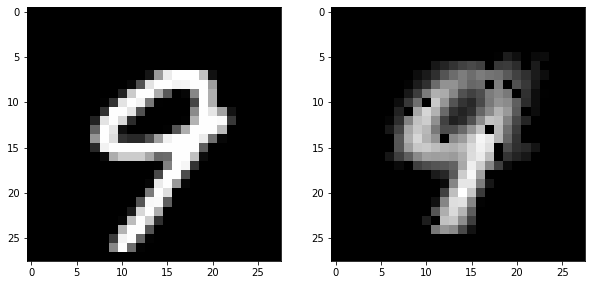

In [6]:
from dataset.mnist import load_mnist

(x_train,t_train),(x_test,t_test)=load_mnist(normalize=True)
x_test=x_test.reshape(x_test.shape[0],1,28,28)
model.show_predict(x_test)

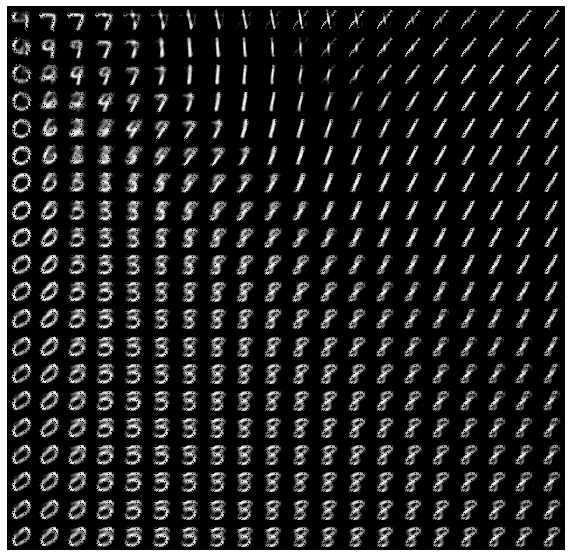

In [7]:
model.show_generate(0,1,0.05)

In [ ]:
model.save_params(ROOT_PATH+'pkl/'+str(trainer.loss_list[-1])+'_ConvAE_N'+str(batch_size)+str(args_model)+'_'+str(optimizer.__class__.__name__)+str(lr)+'.pkl')